# Notebook 12 - Visualize and Deploy Meal Box Plans

This notebook provides a high-level summary and deployment output for meal box plans. We:

- Visualize how meal boxes are distributed across stores.
- Rank stores by number of recipes matched.
- Merge store names and addresses.
- Optionally export store-specific inventory plans.

Inputs:
- `store_mealbox_ranked.csv`
- `recipes_with_ontology.csv`
- `NAW filialen.xlsx` (store metadata)

Outputs:
- `store_summary_mealbox_counts.csv`
- (Optional) Per-store meal box CSVs in `store_exports/`


In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Paths
input_folder = "cleaned_data"
deployment_folder = "store_exports"
os.makedirs(deployment_folder, exist_ok=True)

# Load input files
df_ranked = pd.read_csv(os.path.join(input_folder, "store_mealbox_ranked.csv"))
df_recipes = pd.read_csv(os.path.join(input_folder, "recipes_with_ontology.csv"))
df_stores = pd.read_excel("C:/Users/User/Desktop/University/BEP/Data/Dirk data/NAW filialen.xlsx")

# Normalize column names
df_stores.columns = df_stores.columns.str.strip().str.lower()
df_stores.rename(columns={"fil. nr.": "store"}, inplace=True)

print("Meal boxes:", df_ranked.shape)
print("Recipes:", df_recipes.shape)
print("Stores:", df_stores.shape)


Meal boxes: (9, 4)
Recipes: (6, 6)
Stores: (135, 5)


In [6]:
# Count number of meal boxes per store
store_summary = df_ranked.groupby("store")["recipe"].count().reset_index()
store_summary.columns = ["store", "mealbox_count"]

# Merge with store metadata
store_summary = store_summary.merge(df_stores, on="store", how="left")

# Sort by count
store_summary_sorted = store_summary.sort_values("mealbox_count", ascending=False)
display(store_summary_sorted.head(10))


,store,mealbox_count,filiaal,adres,postcode,plaatsnaam
0,1024,1,Sassenheim Wasbeekerlaan,Wasbeekerlaan 63,2171 AE,Sassenheim
1,1058,1,Leiden Langegracht,Langegracht 3,2312 NV,Leiden
2,1160,1,Zandvoort Burg. Engelbertsstraat,Burg. Engelbertsstraat 21,2042 KM,Zandvoort
3,3298,1,Utrecht Vasco Da Gamalaan,Vasco Da Gamalaan 1-5,3526 ER,Utrecht
4,3345,1,Maarssen Bisonspoor - 2.0,Bisonspoor 1116,3605 KN,Maarssen
5,4243,1,Hardinxveld-Giessendam Den Bogerd,Den Bogerd 24,3371 AM,Hardinxveld-Giessendam
6,4260,1,Barendrecht Muziekplein,Muziekplein 5,2992 GH,Barendrecht
7,4278,1,Sliedrecht Fazantplein,Fazantplein 3,3362 BA,Sliedrecht
8,5070,1,Goes Beukenhof,Beukenhof 1,4462 EN,Goes


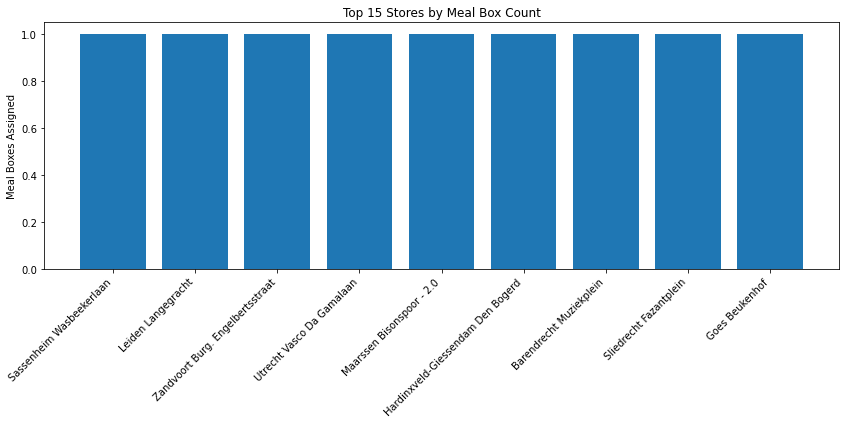

In [7]:
plt.figure(figsize=(12, 6))
top_n = store_summary_sorted.head(15)
plt.bar(top_n["filiaal"], top_n["mealbox_count"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Meal Boxes Assigned")
plt.title("Top 15 Stores by Meal Box Count")
plt.tight_layout()
plt.show()


In [8]:
summary_output_path = os.path.join(input_folder, "store_summary_mealbox_counts.csv")
store_summary_sorted.to_csv(summary_output_path, index=False)
print("Store summary saved to:", summary_output_path)


Store summary saved to: cleaned_data\store_summary_mealbox_counts.csv


In [9]:
# Optional: export one CSV per store with recipe names and ingredients
grouped = df_ranked.explode("ingredients").groupby("store")

for store_id, df_store in grouped:
    export_path = os.path.join(deployment_folder, f"mealbox_plan_store_{store_id}.csv")
    df_export = df_store[["recipe", "ingredients"]]
    df_export.to_csv(export_path, index=False)


## Summary

This notebook finalized the deployment layer for waste-aware meal boxes:

- Merged meal box plans with store metadata.
- Ranked stores by readiness (number of complete recipes).
- Visualized distribution of meal kits across top locations.
- (Optional) Generated CSVs per store for deployment.

This enables targeted interventions at the store level, helping reduce food waste while aligning operational strategy with data-driven insights.
